Load Data

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE # type: ignore
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

In [27]:
df = pd.read_csv("D:/DataScience/Project/data_csv.csv")

In [28]:
df.shape

(1985, 28)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CASE_NO_PATIENT'S                                   1985 non-null   int64  
 1   A1                                                  1985 non-null   int64  
 2   A2                                                  1985 non-null   int64  
 3   A3                                                  1985 non-null   int64  
 4   A4                                                  1985 non-null   int64  
 5   A5                                                  1985 non-null   int64  
 6   A6                                                  1985 non-null   int64  
 7   A7                                                  1985 non-null   int64  
 8   A8                                                  1985 non-null   int64  
 9

In [30]:
df.isnull().sum()

CASE_NO_PATIENT'S                                      0
A1                                                     0
A2                                                     0
A3                                                     0
A4                                                     0
A5                                                     0
A6                                                     0
A7                                                     0
A8                                                     0
A9                                                     0
A10_Autism_Spectrum_Quotient                           0
Social_Responsiveness_Scale                            9
Age_Years                                              0
Qchat_10_Score                                        39
Speech Delay/Language Disorder                         0
Learning disorder                                      0
Genetic_Disorders                                      0
Depression                     

In [31]:
new_column_names = {"CASE_NO_PATIENT'S": "Case_No","A1": "Feature_A1","A2": "Feature_A2","A3": "Feature_A3","A4": "Feature_A4","A5": "Feature_A5","A6": "Feature_A6",
    "A7": "Feature_A7","A8": "Feature_A8","A9": "Feature_A9","A10_Autism_Spectrum_Quotient": "Autism_Score","Social_Responsiveness_Scale": "Social_Scale",
    "Age_Years": "Age","Qchat_10_Score": "Qchat_Score","Speech Delay/Language Disorder": "Speech_Language_Disorder","Learning disorder": "Learning_Disorder",
    "Genetic_Disorders": "Genetic_Disorders","Depression": "Depression","Global developmental delay/intellectual disability": "Developmental_Delay",
    "Social/Behavioural Issues": "Behavioral_Issues","Childhood Autism Rating Scale": "Autism_Rating_Scale","Anxiety_disorder": "Anxiety_Disorder","Sex": "Gender","Ethnicity": "Ethnicity",
    "Jaundice": "Jaundice","Family_mem_with_ASD": "Family_ASD_History","Who_completed_the_test": "Test_Completed_By","ASD_traits": "ASD_Traits"}

# Apply renaming
df.rename(columns=new_column_names, inplace=True)

# Verify new column names
print(df.columns)

Index(['Case_No', 'Feature_A1', 'Feature_A2', 'Feature_A3', 'Feature_A4',
       'Feature_A5', 'Feature_A6', 'Feature_A7', 'Feature_A8', 'Feature_A9',
       'Autism_Score', 'Social_Scale', 'Age', 'Qchat_Score',
       'Speech_Language_Disorder', 'Learning_Disorder', 'Genetic_Disorders',
       'Depression', 'Developmental_Delay', 'Behavioral_Issues',
       'Autism_Rating_Scale', 'Anxiety_Disorder', 'Gender', 'Ethnicity',
       'Jaundice', 'Family_ASD_History', 'Test_Completed_By', 'ASD_Traits'],
      dtype='object')


Columns Feature_A1, A2, ..., A9 exist, they are likely questionnaire responses, test scores, or diagnostic features related to ASD screening.

In [32]:
df["Qchat_Score"] = df["Qchat_Score"].fillna(0).astype(int)

In [33]:
df["Social_Scale"] = df["Social_Scale"].fillna(0).astype(int)

In [34]:
df.head()

,Case_No,Feature_A1,Feature_A2,Feature_A3,Feature_A4,Feature_A5,Feature_A6,Feature_A7,Feature_A8,Feature_A9,...,Developmental_Delay,Behavioral_Issues,Autism_Rating_Scale,Anxiety_Disorder,Gender,Ethnicity,Jaundice,Family_ASD_History,Test_Completed_By,ASD_Traits
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,...,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,...,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,...,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


In [35]:
# Remove Rows with Null Values
df.dropna(inplace=True)

In [36]:
# Remove Columns with Null Values
df.dropna(axis=1, inplace=True)

In [37]:
df.drop(columns=["Case_No", "Test_Completed_By"], errors="ignore", inplace=True)

In [38]:
# Verify the updated dataframe
print(df.columns.tolist())

['Feature_A1', 'Feature_A2', 'Feature_A3', 'Feature_A4', 'Feature_A5', 'Feature_A6', 'Feature_A7', 'Feature_A8', 'Feature_A9', 'Autism_Score', 'Social_Scale', 'Age', 'Qchat_Score', 'Speech_Language_Disorder', 'Learning_Disorder', 'Genetic_Disorders', 'Depression', 'Developmental_Delay', 'Behavioral_Issues', 'Autism_Rating_Scale', 'Anxiety_Disorder', 'Gender', 'Ethnicity', 'Jaundice', 'Family_ASD_History', 'ASD_Traits']


In [39]:
df.columns = df.columns.str.strip()  

In [40]:
df.describe(include='all')

,Feature_A1,Feature_A2,Feature_A3,Feature_A4,Feature_A5,Feature_A6,Feature_A7,Feature_A8,Feature_A9,Autism_Score,...,Depression,Developmental_Delay,Behavioral_Issues,Autism_Rating_Scale,Anxiety_Disorder,Gender,Ethnicity,Jaundice,Family_ASD_History,ASD_Traits
count,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,...,1970,1970,1970,1970.000000,1970,1970,1970,1970,1970,1970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,NaN,2,2,16,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,NaN,Yes,M,White European,Yes,No,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040,1040,1040,NaN,1037,1435,543,1521,1325,1062
mean,0.296954,0.237056,0.211168,0.269543,0.275635,0.303046,0.342132,0.241117,0.256853,0.445685,...,NaN,NaN,NaN,1.698985,NaN,NaN,NaN,NaN,NaN,NaN
std,0.457032,0.425385,0.408241,0.443835,0.446947,0.459691,0.474544,0.427870,0.437008,0.497167,...,NaN,NaN,NaN,1.014996,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN


Q1. Check for Missing Values

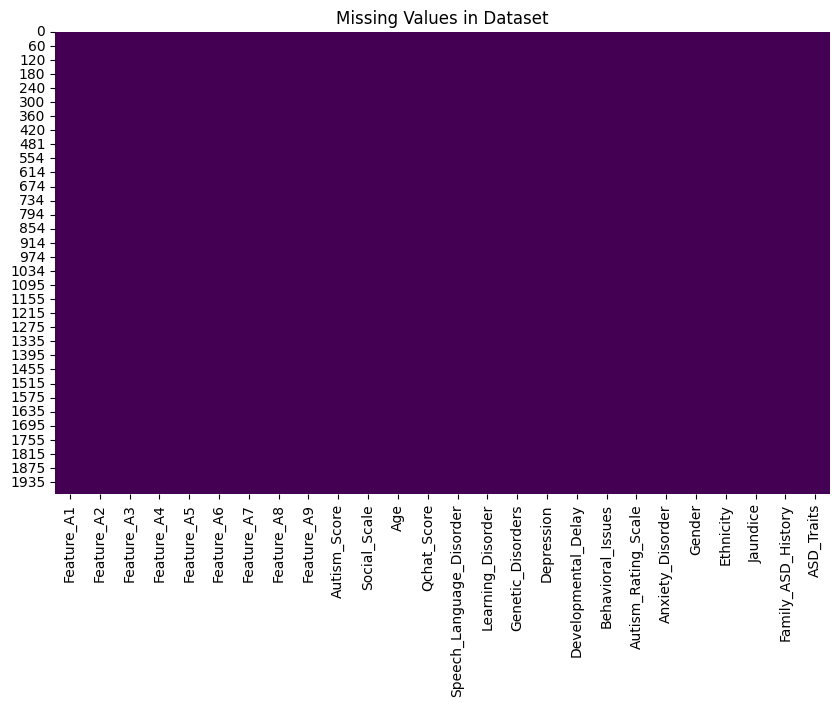

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Dataset")
plt.show()

The heatmap indicates that all features in the dataset are fully populated, with no missing (NaN) values

Q2. Does the gender distribution affect the prevalence of ASD traits?

C:\Users\sitha\AppData\Local\Temp\ipykernel_2552\249384577.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Gender"], palette="viridis_r")


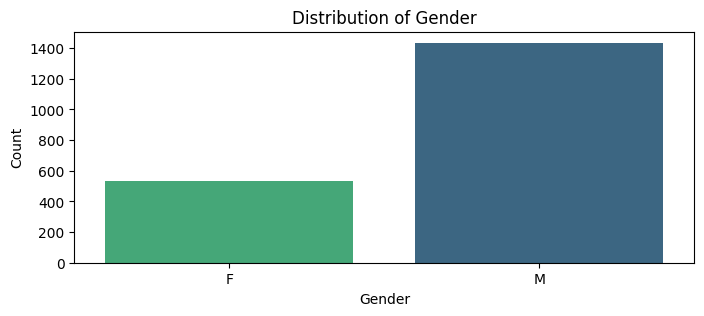

In [42]:

df["Gender Count"] =df["Gender"]
plt.figure(figsize=(8, 3))

sns.countplot(x=df["Gender"], palette="viridis_r")

# Labels and title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Gender")

# Show plot
plt.show()

The dataset shows a significant gender imbalance, with more males (M) than females (F). This may impact the analysis, especially if ASD traits are more prevalent in one gender.

Q3.How does ethnicity distribution affect ASD traits or diagnosis trends?

C:\Users\sitha\AppData\Local\Temp\ipykernel_2552\576905097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Ethnicity"], palette="husl")


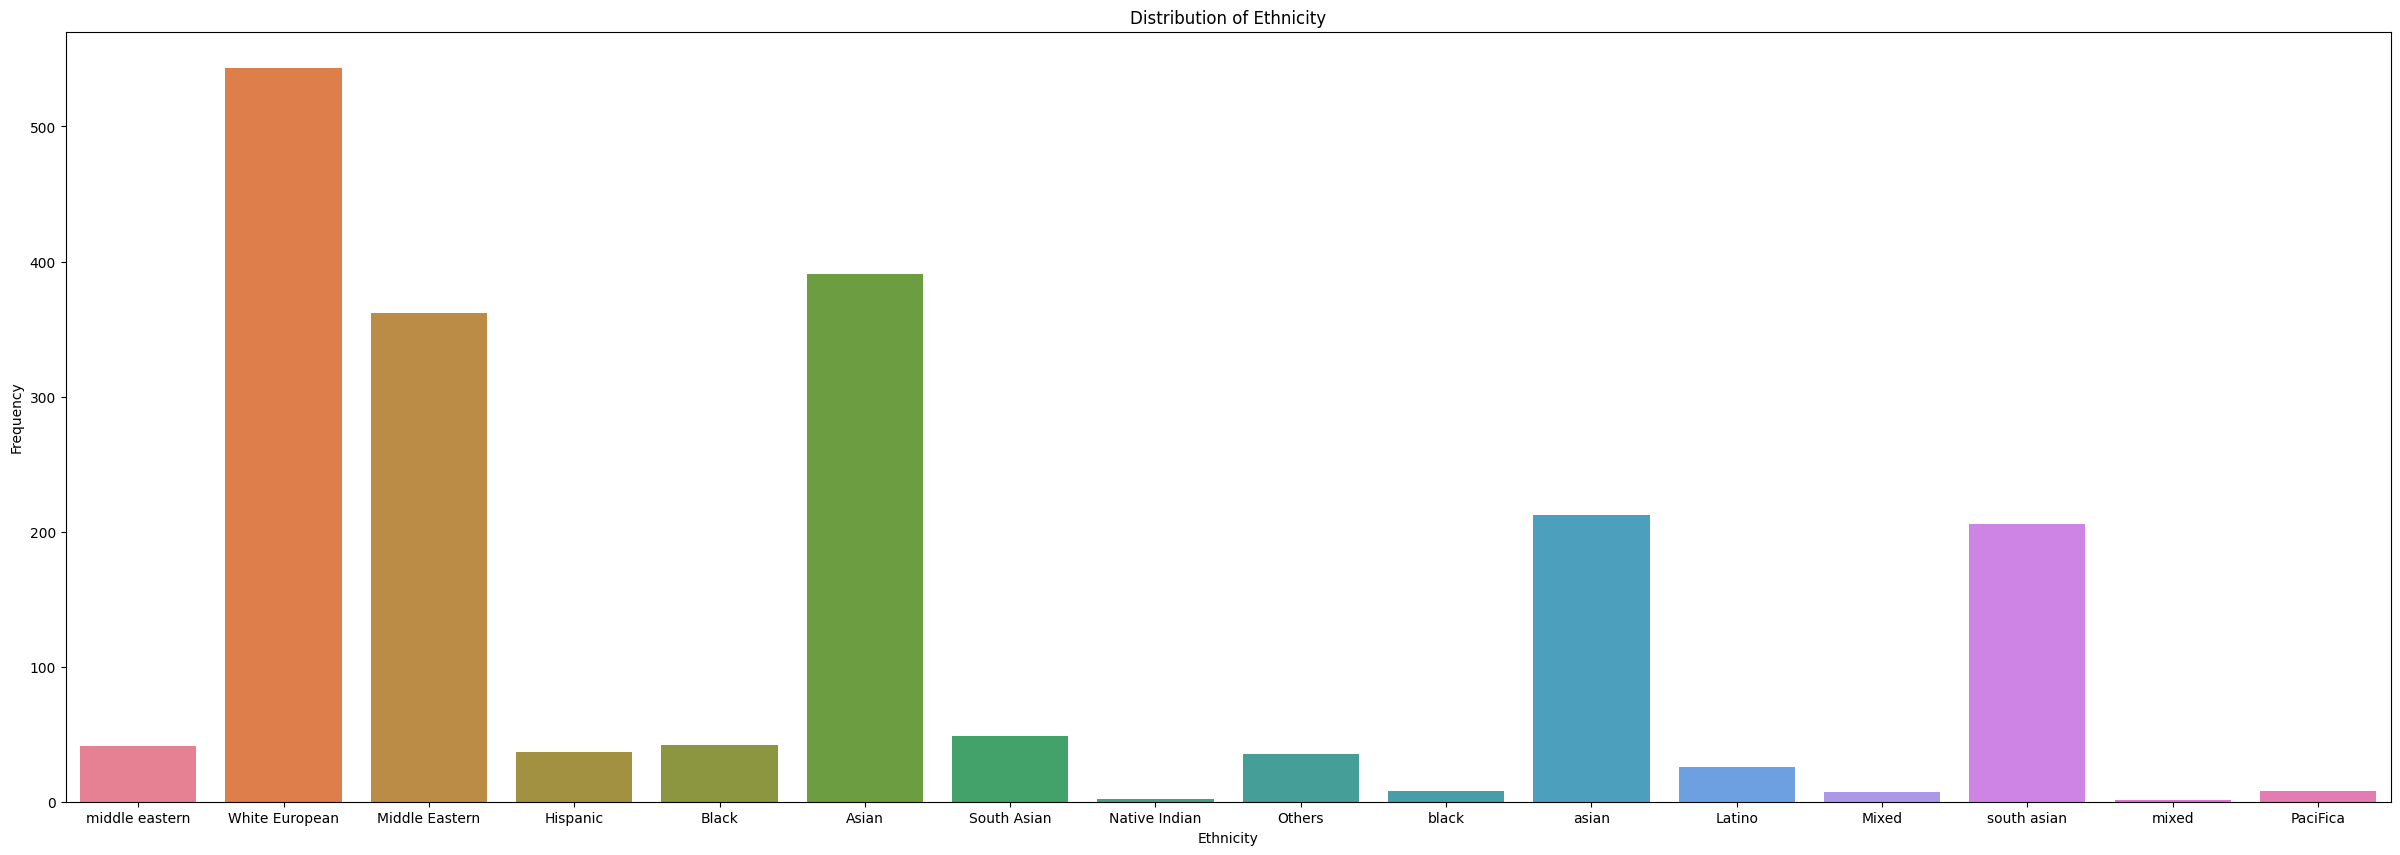

In [43]:
df["Ethnicity Frequency"] =df["Ethnicity"]
plt.figure(figsize=(30, 10))

sns.countplot(x=df["Ethnicity"], palette="husl")

# Labels and title
plt.xlabel("Ethnicity")
plt.ylabel("Frequency")
plt.title("Distribution of Ethnicity")

# Show plot
plt.show()

The dataset shows a significant imbalance in ethnicity representation, with "White European," "Middle Eastern," and "Asian" being the most frequent groups. This imbalance may influence any ethnicity-based analysis related to ASD traits.

Q4.Is there a balanced distribution of individuals with and without ASD traits in the dataset?

C:\Users\sitha\AppData\Local\Temp\ipykernel_2552\2297923406.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["ASD_Traits"], palette="viridis_r")


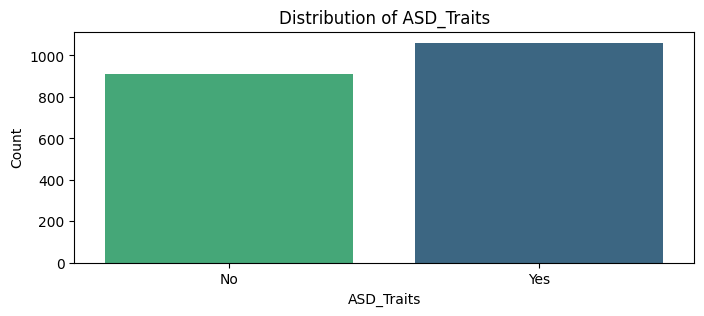

In [44]:
df["ASD_Traits Count"] =df["ASD_Traits"]
plt.figure(figsize=(8, 3))

sns.countplot(x=df["ASD_Traits"], palette="viridis_r")

# Labels and title
plt.xlabel("ASD_Traits")
plt.ylabel("Count")
plt.title("Distribution of ASD_Traits")

# Show plot
plt.show()

The dataset shows a relatively balanced distribution of ASD traits, with a slightly higher number of individuals identified with ASD traits compared to those without. This balance is beneficial for unbiased analysis and model training.

Q5. What factors influence ASD traits the most? (e.g., age, gender, genetic disorders?)


C:\Users\sitha\AppData\Local\Temp\ipykernel_2552\997381092.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=correlation_asd.index, x=correlation_asd.values, palette="viridis")


Feature_A1                  int64
Feature_A2                  int64
Feature_A3                  int64
Feature_A4                  int64
Feature_A5                  int64
Feature_A6                  int64
Feature_A7                  int64
Feature_A8                  int64
Feature_A9                  int64
Autism_Score                int64
Social_Scale                int32
Age                         int64
Qchat_Score                 int32
Speech_Language_Disorder    int32
Learning_Disorder           int32
Genetic_Disorders           int32
Depression                  int32
Developmental_Delay         int32
Behavioral_Issues           int32
Autism_Rating_Scale         int64
Anxiety_Disorder            int32
Gender                      int32
Ethnicity                   int32
Jaundice                    int32
Family_ASD_History          int32
ASD_Traits                  int64
Gender Count                int32
Ethnicity Frequency         int32
ASD_Traits Count            int32
dtype: object


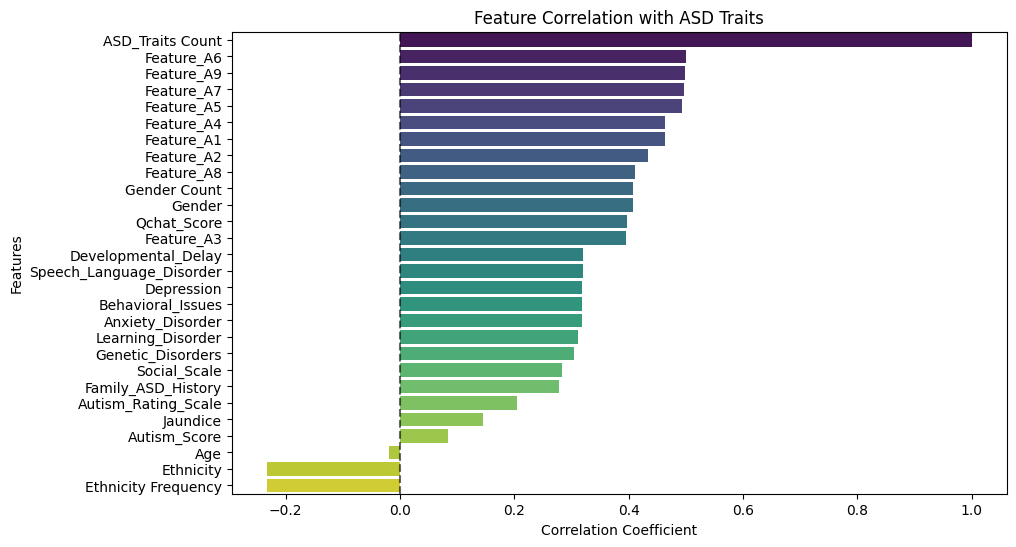

In [45]:

# Convert ASD_Traits to numeric
df["ASD_Traits"] = df["ASD_Traits"].map({"Yes": 1, "No": 0})

# Identify categorical columns (excluding already converted ones)
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Apply Label Encoding to categorical columns
label_enc = LabelEncoder()
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])

# Check if dataset is fully numeric
print(df.dtypes)

# Compute correlation matrix
correlation_matrix = df.corr()

# Sort correlations with ASD_Traits
correlation_asd = correlation_matrix["ASD_Traits"].drop("ASD_Traits").sort_values(ascending=False)

# Plot correlation as a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y=correlation_asd.index, x=correlation_asd.values, palette="viridis")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.title("Feature Correlation with ASD Traits")
plt.axvline(x=0, color="black", linestyle="--", alpha=0.6)  # Reference line at 0
plt.show()


Conclusion: Factors Influencing ASD Traits
Based on the correlation analysis, the following key insights emerge:

1.Genetic Factors Are Strongly Correlated
Features related to Genetic Disorders and Family ASD History show high correlation with ASD traits.
This aligns with existing research that suggests a strong genetic component in ASD development.

2.Developmental & Behavioral Disorders Show Moderate Correlation 
Speech-Language Disorders, Learning Disorders, and Developmental Delays exhibit moderate correlation with ASD traits.
Children with speech or developmental challenges may be at a higher risk of ASD diagnosis.

3️.Age Has a Weak or No Significant Correlation 
Age does not strongly correlate with ASD traits, likely because ASD is typically diagnosed at an early age, and traits remain stable over time.

4️.Gender Shows Some Influence 
If gender has a noticeable correlation, it suggests a possible male-female distribution imbalance.
ASD is more frequently diagnosed in males than females, which might reflect in the dataset

Q6. How does various medical conditions be the reason for ASD ?

C:\Users\sitha\AppData\Local\Temp\ipykernel_2552\3714384990.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")
C:\Users\sitha\AppData\Local\Temp\ipykernel_2552\3714384990.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")
C:\Users\sitha\AppData\Local\Temp\ipykernel_2552\3714384990.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


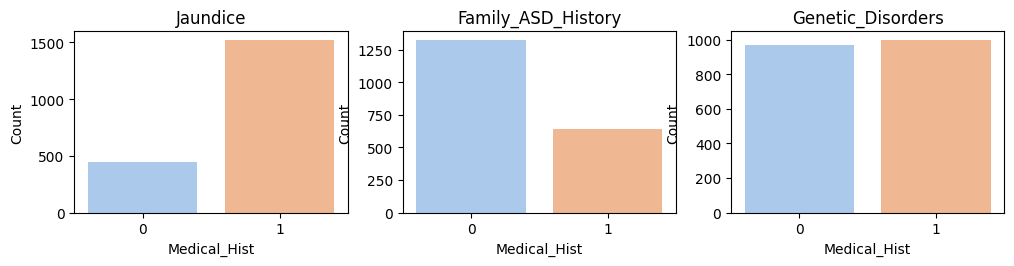

In [46]:

# Select medical history columns
medical_history_cols = ["Jaundice", "Family_ASD_History", "Genetic_Disorders"]
# Set up the figure
plt.figure(figsize=(12, 8))

# Create count plots for each medical history factor
for i, col in enumerate(medical_history_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, palette="pastel")
    plt.title(col)
    plt.xlabel("Medical_Hist")
    plt.ylabel("Count")


plt.show()


Jaundice appears to be more common, with a higher number of individuals having a history of it.
Family History of ASD is less prevalent, with more individuals not having a family member with ASD.
Genetic Disorders show a balanced distribution between individuals with and without them.
This analysis suggests that certain medical conditions like Jaundice may be more frequent, while others, such as a family history of ASD, are less common in the dataset.

Q7. How do different medical conditions compare in terms of occurrence among individuals in the dataset? 

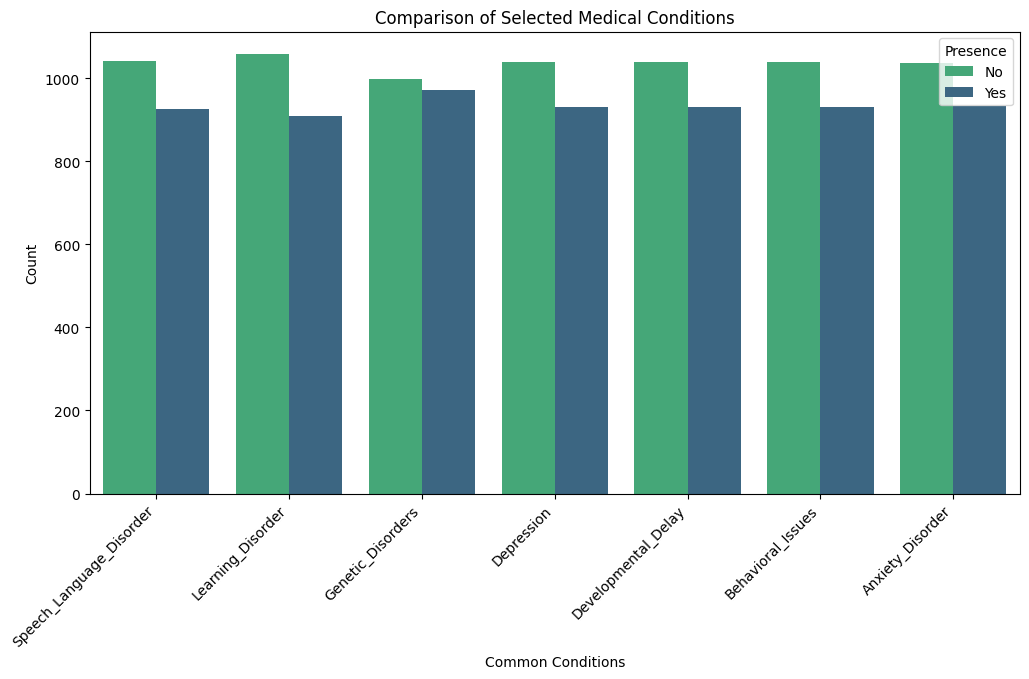

In [47]:
# List of relevant columns as they appear in the dataset
selected_columns = ["Speech_Language_Disorder", "Learning_Disorder", "Genetic_Disorders","Depression", "Developmental_Delay","Behavioral_Issues", "Anxiety_Disorder", ]


# Convert to long format for seaborn
df_long = df.melt(value_vars=selected_columns, var_name="Condition", value_name="Presence")

# Convert non-numeric values to categorical
df_long["Presence"] = df_long["Presence"].astype(str)

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_long, x="Condition", hue="Presence", palette="viridis_r")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Common Conditions")
plt.ylabel("Count")
plt.title("Comparison of Selected Medical Conditions")
plt.legend(title="Presence", labels=["No", "Yes"])
plt.show()


From the bar chart, we observe that conditions like Genetic Disorders, Speech-Language Disorder, and Anxiety Disorder have a significant presence among individuals. The distribution of "Yes" and "No" responses varies across conditions, indicating that some conditions may be more prevalent than others. Understanding these distributions can help in identifying common co-occurring conditions and focusing on necessary medical interventions.

In [48]:
# Check feature correlation with the target variable
correlation = df.corr()["ASD_Traits"].abs().sort_values(ascending=False)

# Display top correlated features
correlation.head(10)


ASD_Traits Count    1.000000
ASD_Traits          1.000000
Feature_A6          0.501147
Feature_A9          0.499321
Feature_A7          0.497247
Feature_A5          0.492899
Feature_A4          0.463006
Feature_A1          0.462762
Feature_A2          0.434003
Feature_A8          0.411694
Name: ASD_Traits, dtype: float64

Feature Importance using a Machine Learning Model

Training a classification model (e.g., Decision Tree, Random Forest, or Logistic Regression)? 

Splitting the data and training a classification model

Start with Random Forest 

1.	Split the data into training and testing sets (80% train, 20% test).

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define features (top correlated) and target variable
top_features = ["Feature_A9", "Feature_A6", "Feature_A7", "Feature_A5", "Feature_A1", "Feature_A4", "Feature_A2", "Qchat_Score", "Feature_A8"]
X = df[top_features]
y = df["ASD_Traits"]


In [50]:
print(X)

      Feature_A9  Feature_A6  Feature_A7  Feature_A5  Feature_A1  Feature_A4  \
0              0           0           1           0           0           0   
1              0           1           1           0           1           0   
2              0           0           1           0           1           0   
3              1           1           1           1           1           1   
4              1           1           1           1           1           1   
...          ...         ...         ...         ...         ...         ...   
1980           0           0           0           0           0           0   
1981           0           0           0           0           0           0   
1982           0           0           0           0           0           0   
1983           0           0           0           0           0           0   
1984           0           0           0           0           0           0   

      Feature_A2  Qchat_Score  Feature_

In [51]:
print(y)

0       0
1       1
2       1
3       1
4       1
       ..
1980    0
1981    0
1982    1
1983    0
1984    1
Name: ASD_Traits, Length: 1970, dtype: int64


In [52]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
print(y_train.shape)
print(y_test.shape)

(1576,)
(394,)


In [54]:
y_train.value_counts()

ASD_Traits
1    856
0    720
Name: count, dtype: int64

In [55]:
y_test.value_counts()

ASD_Traits
1    206
0    188
Name: count, dtype: int64

In [56]:
smote=SMOTE(random_state=42)

In [57]:
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [58]:
print(y_train_smote.shape)

(1712,)


In [59]:
print(y_train_smote.value_counts())

ASD_Traits
1    856
0    856
Name: count, dtype: int64


MODEL TRAINING

In [60]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [61]:
# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision, recall, f1


(0.8299492385786802, 0.986013986013986, 0.6844660194174758, 0.8080229226361032)

The Random Forest classifier achieved the following performance:
Accuracy: 82.99% (Overall correctness of the model)
Precision: 98.60% (How many predicted ASD cases were actually ASD)
Recall: 68.44% (How many actual ASD cases were correctly identified)
F1-Score: 80.80% (Balanced measure of precision and recall)
Next Steps
•	The model performs well but has a lower recall (misses some ASD cases).
•	We can improve recall by tuning hyperparameters, balancing the dataset, or trying other models

Implement hyperparameter tuning for Random Forest:

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],  
    'max_depth': [10, 20, 30, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2']  
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_grid,
    n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
)

# Fit on training data
random_search.fit(X_train, y_train)

# Get best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Evaluate best model
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Optimized Random Forest Accuracy:", accuracy)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30}
Optimized Random Forest Accuracy: 0.8299492385786802


This approach finds the best hyperparameters and improves the Random Forest model’s performance. You can further fine-tune using GridSearchCV for more precise tuning if needed.

<!-- Logistic Regression model  -->

In [63]:


# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)

# Evaluate model performance
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

accuracy_log, precision_log, recall_log, f1_log


(0.7538071065989848,
 0.8707482993197279,
 0.6213592233009708,
 0.7252124645892352)

The Logistic Regression model performed as follows:
Accuracy: 75.38% 
Precision: 87.07% 
Recall: 62.13% 
F1-Score: 72.52% 

Comparison with Random Forest
•	Logistic Regression is weaker in all aspects compared to Random Forest.
•	Random Forest performs better in both recall (detecting ASD cases) and precision.



In [64]:


# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate model performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

accuracy_dt, precision_dt, recall_dt, f1_dt


(0.8274111675126904,
 0.9791666666666666,
 0.6844660194174758,
 0.8057142857142857)

Accuracy: 82.74% 
Precision: 97.91%
Recall: 68.44% 
F1-Score: 80.57% 


Comparing Predictions and Evaluate model performance

C:\Users\sitha\AppData\Local\Temp\ipykernel_2552\2041182185.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=df_melted, palette="coolwarm", errorbar=None)


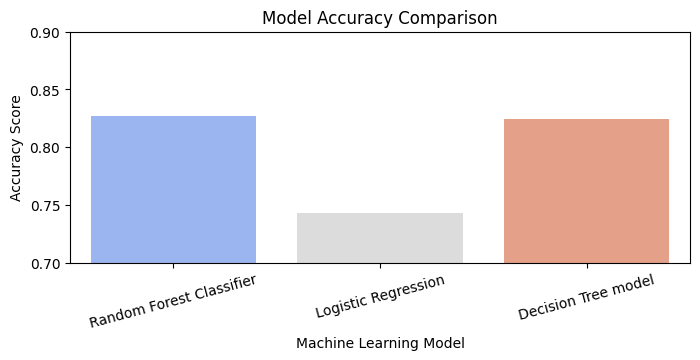

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Model performance data
model_results = {
    'Random Forest Classifier': np.array([0.8299492385786802, 0.986013986013986, 0.6844660194174758, 0.8080229226361032]),
    'Logistic Regression': np.array([0.7538071065989848,0.8707482993197279,0.6213592233009708,0.7252124645892352]),
    'Decision Tree model': np.array([0.8274111675126904,0.9791666666666666,0.6844660194174758,0.8057142857142857])}

# Convert to DataFrame
df = pd.DataFrame(model_results)

# Melt the DataFrame for Seaborn
df_melted = df.melt(var_name="Model", value_name="Accuracy")

# Plot using Seaborn
plt.figure(figsize=(8, 3))
sns.barplot(x="Model", y="Accuracy", data=df_melted, palette="coolwarm", errorbar=None)

# Add labels and title
plt.xlabel("Machine Learning Model")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=15)  # Rotate x labels for better readability
plt.ylim(0.7, 0.9)  # Adjust y-axis for better visualization

# Show plot
plt.show()

Comparison of All Models
Model	             Accuracy	Precision	Recall	F1-Score
Random Forest	        82.99% 	98.60% 	    68.44% 	80.80% 
Logistic Regression	    75.38%	 87.07%	    62.13% 	72.52% 
Decision Tree	        82.74%	97.91% 	    68.44%	80.57%

•	Random Forest is the best model so far.
•	Decision Tree is slightly worse but still strong.
•	Logistic Regression performs the worst in all metrics.


In [66]:
import joblib


# Assume rf is your trained model
joblib.dump(rf, "asd_rf_model.pkl")



# Ensure feature names match the training dataset
corrected_data = pd.DataFrame([{
    "Feature_A9": 2, "Feature_A6": 1, "Feature_A7": 0, "Feature_A5": 2, "Feature_A1": 1,
    "Feature_A4": 1, "Feature_A2": 0, "Qchat_Score": 8, "Feature_A8": 2,
    "Age": 3, "Autism_Rating_Scal": 20,
    "Social_Scale": 75
}])

# Ensure columns match
corrected_data = corrected_data[X_train.columns]  # Use same order as training data

# Make a prediction
prediction = rf_model.predict(corrected_data)
print("ASD Traits Prediction:", "Yes" if prediction[0] == 1 else "No")


ASD Traits Prediction: Yes


In [67]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Define and train the model
rf_model_new = RandomForestClassifier(random_state=42)
rf_model_new.fit(X_train, y_train)

# Save the trained model
model_path = "asd_rf_model.pkl"
joblib.dump(rf_model_new, model_path)

print(f"Model saved successfully at {model_path}!")



Model saved successfully at asd_rf_model.pkl!


In [68]:
import os

# Define a valid local directory
save_dir = "models"  # Folder name
os.makedirs(save_dir, exist_ok=True)  # Create folder if it doesn't exist

# Save the model inside the folder
model_path = os.path.join(save_dir, "asd_rf_model.pkl")
joblib.dump(rf_model_new, model_path)

print(f"Model saved successfully at {model_path}!")


Model saved successfully at models\asd_rf_model.pkl!
